# Heart Disease Prediction model:
### Tree models - Upgrad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart_v2.csv')

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [6]:
x=df.drop('heart disease', axis=1)
y=df['heart disease'].copy()

In [7]:
# train_test_split
from sklearn.model_selection import train_test_split

In [8]:
x.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, random_state=27)
x_train.shape, x_test.shape

((189, 4), (81, 4))

## Building the decision tree model
use all default parameters except depth

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier(max_depth=3)

In [12]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
!pip install IPython

In [14]:
!pip install pydotplus

In [15]:
!pip install graphviz

In [21]:
brew install graphviz

SyntaxError: invalid syntax (797003321.py, line 1)

In [16]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [18]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names = x.columns,
                class_names = ['No Disease','Disease'])
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [23]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

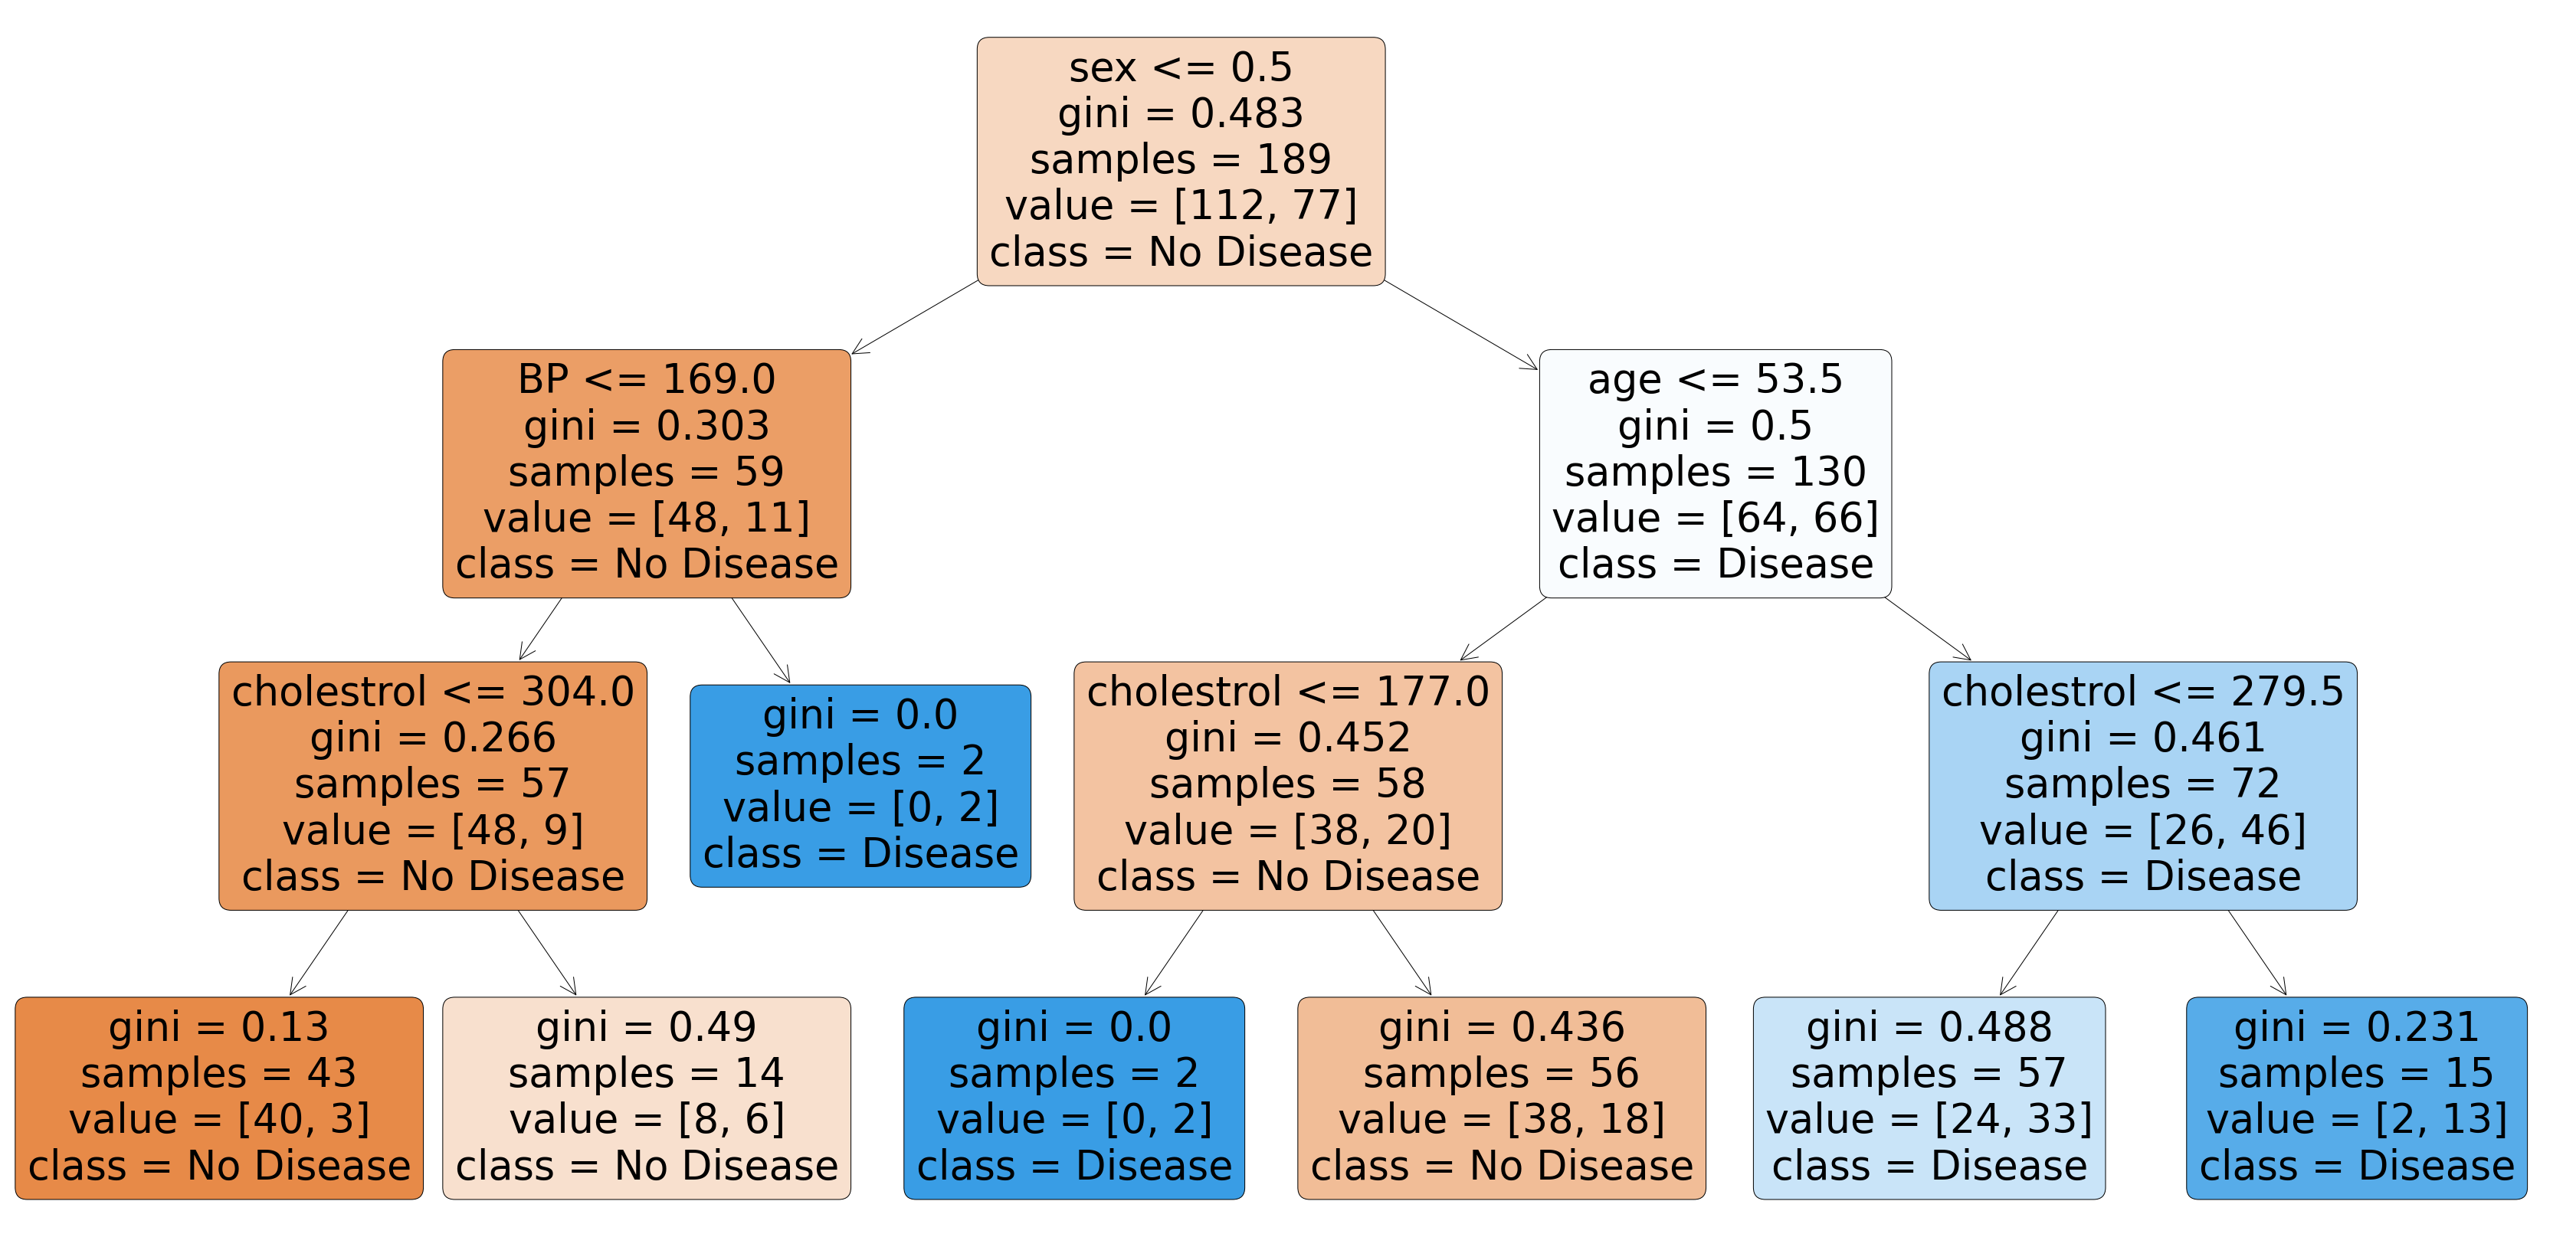

In [30]:
dot_data = StringIO()  

# export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
#                 feature_names=x.columns, 
#                 class_names=['No Disease', "Disease"])

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, filled=True, class_names=['No Disease','Disease'], feature_names=x.columns, rounded=True);

In [31]:
# evaluating the model performance on the test set
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7195767195767195


array([[86, 26],
       [27, 50]])

In [35]:
print('test set performance')
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

test set performance
0.691358024691358


array([[30,  8],
       [17, 26]])